# Data Loading

In [ ]:

import pandas as pd
import os
from os.path import exists
import zipfile
import numpy as np
from datetime import datetime

In [ ]:
SEED=42

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0


In [ ]:
!gdown https://drive.google.com/uc?id=1BwMbJM2St5TMroSiLo94HOm5u2kCSq-B

Downloading...
From: https://drive.google.com/uc?id=1BwMbJM2St5TMroSiLo94HOm5u2kCSq-B
To: /content/caltech.zip
100% 137M/137M [00:01<00:00, 121MB/s]


In [ ]:
!rm -r data
!rm -r caltech-101

rm: cannot remove 'data': No such file or directory
rm: cannot remove 'caltech-101': No such file or directory


In [ ]:
!unzip -o "caltech.zip"  -d  "/content"


Streaming output truncated to the last 5000 lines.
  inflating: /content/caltech-101/ceiling_fan/image_0030.jpg  
  inflating: /content/caltech-101/ceiling_fan/image_0031.jpg  
  inflating: /content/caltech-101/ceiling_fan/image_0032.jpg  
  inflating: /content/caltech-101/ceiling_fan/image_0033.jpg  
  inflating: /content/caltech-101/ceiling_fan/image_0034.jpg  
  inflating: /content/caltech-101/ceiling_fan/image_0035.jpg  
  inflating: /content/caltech-101/ceiling_fan/image_0036.jpg  
  inflating: /content/caltech-101/ceiling_fan/image_0037.jpg  
  inflating: /content/caltech-101/ceiling_fan/image_0038.jpg  
  inflating: /content/caltech-101/ceiling_fan/image_0039.jpg  
  inflating: /content/caltech-101/ceiling_fan/image_0040.jpg  
  inflating: /content/caltech-101/ceiling_fan/image_0041.jpg  
  inflating: /content/caltech-101/ceiling_fan/image_0042.jpg  
  inflating: /content/caltech-101/ceiling_fan/image_0043.jpg  
  inflating: /content/caltech-101/ceiling_fan/image_0044.jpg  
  in

In [ ]:
imagelist=dict()
subfolders= [f.path for f in os.scandir("caltech-101") if f.is_dir()]


In [ ]:
for folder in subfolders:
  imagelist[folder]=list()

In [ ]:

img_folder = 'data/'
if not os.path.exists(img_folder) or len(os.listdir(img_folder)) == 0:
    os.makedirs(img_folder, exist_ok=True)
    
    

In [ ]:
import shutil
import os

subfolders= [f.path for f in os.scandir("caltech-101") if f.is_dir()]
dest="/content/data"
for dirname in list(subfolders):
 
  src_files = os.listdir(dirname)

  for file_name in src_files:
    classname=dirname.split("/")[1]
    newfile=classname+file_name;
    
    os.rename(dirname+"/"+file_name, dirname+"/"+newfile)

In [ ]:
import shutil

subfolders= [f.path for f in os.scandir("caltech-101") if f.is_dir()]
dest="/content/data"
for dirname in list(subfolders):
 
  src_files = os.listdir(dirname)
  for file_name in src_files:
    newfile=dirname+file_name;
    print('content/'+dirname+"/"+file_name)
    shutil.copy(dirname+"/"+file_name, dest)
    imagelist[dirname].append("data/"+file_name)

Streaming output truncated to the last 5000 lines.
content/caltech-101/bonsai/bonsaiimage_0084.jpg
content/caltech-101/bonsai/bonsaiimage_0016.jpg
content/caltech-101/bonsai/bonsaiimage_0053.jpg
content/caltech-101/bonsai/bonsaiimage_0074.jpg
content/caltech-101/bonsai/bonsaiimage_0122.jpg
content/caltech-101/bonsai/bonsaiimage_0064.jpg
content/caltech-101/bonsai/bonsaiimage_0094.jpg
content/caltech-101/bonsai/bonsaiimage_0108.jpg
content/caltech-101/bonsai/bonsaiimage_0077.jpg
content/caltech-101/bonsai/bonsaiimage_0068.jpg
content/caltech-101/bonsai/bonsaiimage_0063.jpg
content/caltech-101/bonsai/bonsaiimage_0117.jpg
content/caltech-101/bonsai/bonsaiimage_0021.jpg
content/caltech-101/bonsai/bonsaiimage_0078.jpg
content/caltech-101/bonsai/bonsaiimage_0087.jpg
content/caltech-101/bonsai/bonsaiimage_0015.jpg
content/caltech-101/bonsai/bonsaiimage_0044.jpg
content/caltech-101/bonsai/bonsaiimage_0051.jpg
content/caltech-101/bonsai/bonsaiimage_0120.jpg
content/caltech-101/bonsai/bonsaiimag

#### Name of the file where user item interaction data avaiable?


In [ ]:
import csv
filename="file.csv" #enter your filename with file path
file=open(filename,'w')
file.write(str("name")+","+str("class")+"\n")

for folder in subfolders: 
       for f in imagelist[folder]:
        file.write(str(f)+","+str(folder)+"\n")
file.close()
  

In [ ]:
imagepath="data/"

### Code Setup

In [ ]:
item_df = pd.read_csv(filename,on_bad_lines='skip')


In [ ]:
item_df.head(1)

,name,class
0,data/starfishimage_0059.jpg,caltech-101/starfish


name of itemid

In [ ]:
itemid='name'

In [ ]:
item_df['image'] = item_df[itemid]


In [ ]:
item_df.head(1)

,name,class,image
0,data/starfishimage_0059.jpg,caltech-101/starfish,data/starfishimage_0059.jpg


# images display

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg

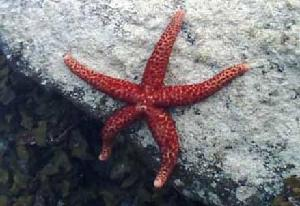

In [ ]:
import cv2
from IPython.display import display, Image
imagename=item_df['image'][0]
display(Image(filename=imagename))


In [ ]:
def iterate_files(_dir):
  result = []
  for root, dirs, files in os.walk(_dir, topdown=True):
    for fl in files:
      if fl.endswith("jpg") or fl.endswith("JPG"):
        result.append(os.path.join(root, fl))
  '''for files in os.walk(_dir, topdown=True):
    (x, y, z) = files
  for fl in z:
    if fl.endswith("jpg") or fl.endswith("JPG"):
      result.append(os.path.join(x, fl))'''
  return result

In [ ]:
image_list = iterate_files('data/')

In [ ]:
from random import sample
queryimage=sample(image_list,500)

# Search with FAISS GPU accuracy .78 time - 152 ms

In [ ]:

!pip install faiss-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import faiss
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('clip-ViT-B-32')



In [ ]:
device = torch.device("cuda")
model.to(device)


SentenceTransformer(
  (0): CLIPModel()
)

In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
import glob
images_list=list(glob.glob('data/*.jpg'))

In [ ]:
import PIL
print("Images:", len(images_list))
img_emb = model.encode([PIL.Image.open(filepath) for filepath in images_list], batch_size=128, convert_to_tensor=False, show_progress_bar=True)


Images: 9144


Batches:   0%|          | 0/72 [00:00<?, ?it/s]

In [ ]:
img_emb.shape[1]

512

In [ ]:

#encoded_data = np.asarray(img_emb)
index = faiss.IndexIDMap(faiss.IndexFlatIP(img_emb.shape[1]))


In [ ]:
index.add_with_ids(img_emb, np.array(range(0, len(images_list))))
faiss.write_index(index, 'item.index')

### fetch details of the document

In [ ]:

def searchfaiss(query, k):
    qv = model.encode([query])
    top_k = index.search(qv, k)
    top_k_ids = top_k[1].tolist()[0]
    top_k_ids = list(np.unique(top_k_ids))
    results =  [images_list[idx] for idx in top_k_ids]
    for i in results:
      display(Image(filename=i))
    return results

### search

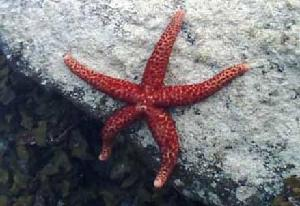

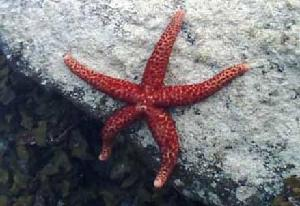

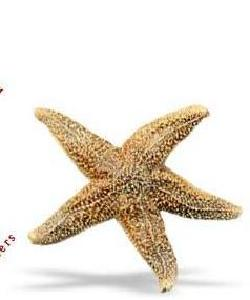

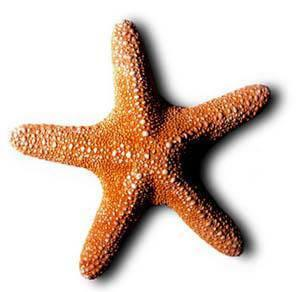

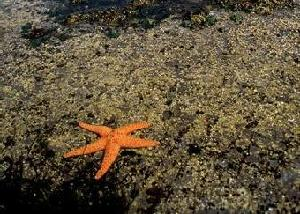

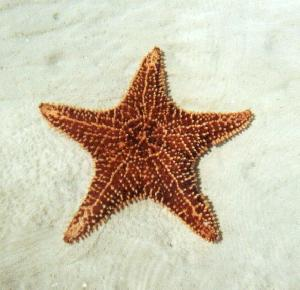

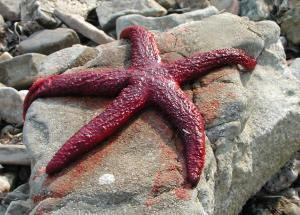

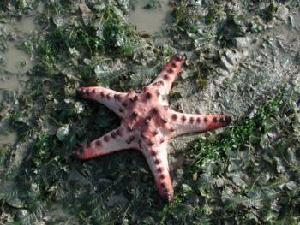

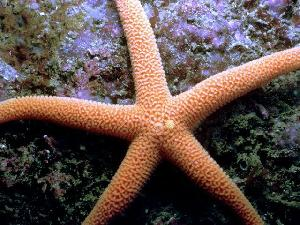

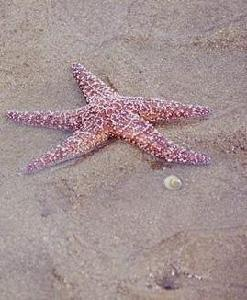

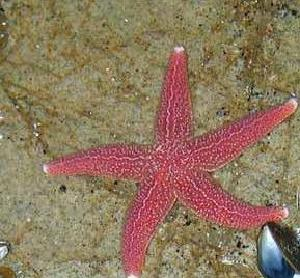

['data/starfishimage_0059.jpg',
 'data/starfishimage_0020.jpg',
 'data/starfishimage_0068.jpg',
 'data/starfishimage_0061.jpg',
 'data/starfishimage_0009.jpg',
 'data/starfishimage_0039.jpg',
 'data/starfishimage_0046.jpg',
 'data/starfishimage_0015.jpg',
 'data/starfishimage_0008.jpg',
 'data/starfishimage_0070.jpg']

In [ ]:
imagename=item_df['image'][0]
display(Image(filename=imagename))
searchfaiss(PIL.Image.open(imagename), k=10)

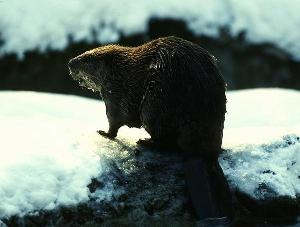

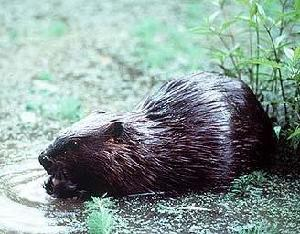

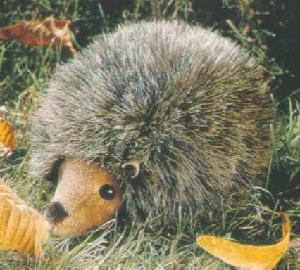

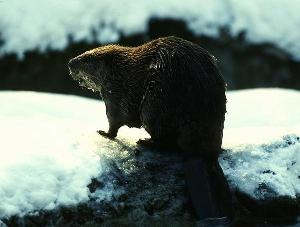

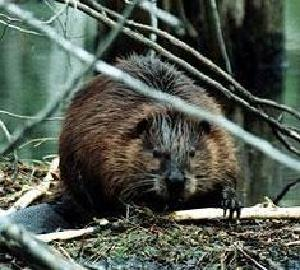

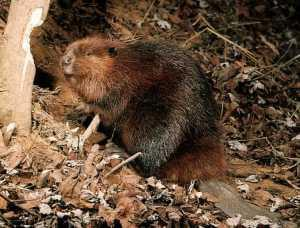

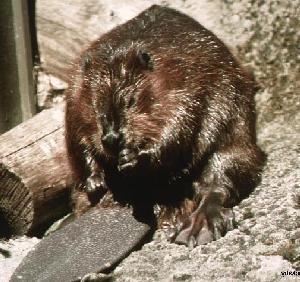

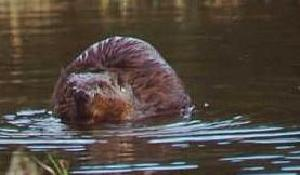

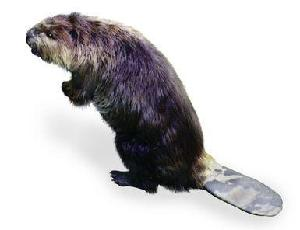

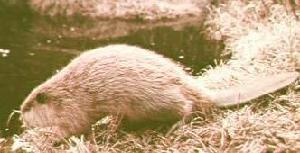

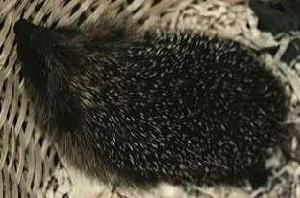

['data/beaverimage_0044.jpg',
 'data/hedgehogimage_0020.jpg',
 'data/beaverimage_0006.jpg',
 'data/beaverimage_0016.jpg',
 'data/beaverimage_0014.jpg',
 'data/beaverimage_0005.jpg',
 'data/beaverimage_0010.jpg',
 'data/beaverimage_0004.jpg',
 'data/beaverimage_0042.jpg',
 'data/hedgehogimage_0026.jpg']

In [ ]:
imagename=item_df['image'][100]
display(Image(filename=imagename))
searchfaiss(PIL.Image.open(imagename), k=10)


## Evaluate

In [ ]:
def searchfaiss_id(query, k):
    qv = model.encode([query])
    top_k = index.search(qv, k)
    top_k_ids = top_k[1].tolist()[0]
    top_k_ids = list(np.unique(top_k_ids))
    results =  [images_list[idx] for idx in top_k_ids]
    return results
    

In [ ]:
results_clip_faiss=dict()

In [ ]:
curr_time = round(time.time()*1000)
for sam_image in queryimage:
  results_clip_faiss[sam_image]=searchfaiss_id(PIL.Image.open(sam_image), k=10)
end_time = round(time.time()*1000)


In [ ]:
print("Total time to search 500 images:",end_time-curr_time)

Total time to search 500 images: 15230


In [ ]:
print("Avarage time:",((end_time-curr_time)/100))

Avarage time: 152.3


In [ ]:
total_hit=0
for key,lst in results_clip_faiss.items():
  label=list(item_df[item_df['image']==key]['class'])[0]
  # print(key)
  # print(label)
  # print("-------------")
  for i in lst:

    # print(i)
    res_label=list(item_df[item_df['image']==i]['class'])[0]
    if(res_label==label):
      total_hit+=1
  # print(total_hit)
  # break


In [ ]:
total_hit

3914

In [ ]:
print('Preceision@10 :'+str(total_hit/(500*10)))

Preceision@10 :0.7828


# Search with FAISS Index training accuracy dropped to .43 search time 103.28

In [ ]:

!pip install faiss-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 18.4 MB/s eta 0:00:00


In [ ]:
!pip install sentence-transformers

In [ ]:
import faiss
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('clip-ViT-B-32')



In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
device = torch.device("cuda")
model.to(device)


SentenceTransformer(
  (0): CLIPModel()
)

In [ ]:
import glob
images_list=list(glob.glob('data/*.jpg'))

In [ ]:
import PIL
print("Images:", len(images_list))
img_emb = model.encode([PIL.Image.open(filepath) for filepath in images_list], batch_size=128, convert_to_tensor=False, show_progress_bar=True)


Images: 9144


Batches:   0%|          | 0/72 [00:00<?, ?it/s]

In [ ]:
img_emb

array([[ 0.51735723, -0.00675272, -0.21534261, ...,  0.3835543 ,
        -0.08269924, -0.03582578],
       [ 0.8678074 ,  0.23244613, -0.06180484, ...,  0.5976368 ,
        -0.08108243,  0.12326711],
       [ 0.35735142, -0.2860456 , -0.38938546, ...,  0.74477094,
        -0.24271628,  0.501532  ],
       ...,
       [ 0.44331795,  0.202213  ,  0.03575738, ...,  0.66578513,
         0.32896078,  0.1834696 ],
       [ 0.40281743, -0.2937181 ,  0.5058726 , ...,  0.49467108,
        -0.43389192,  0.06416766],
       [ 0.58577955,  0.46732268,  0.16309813, ...,  0.623889  ,
        -0.06406991,  0.59944975]], dtype=float32)

In [ ]:
index = faiss.index_factory(img_emb.shape[1], 'IVF100_HNSW32,PQ64')

In [ ]:
index.train(img_emb)

In [ ]:

#encoded_data = np.asarray(img_emb)
#index = faiss.IndexIDMap(faiss.IndexFlatIP(img_emb.shape[1]))


In [ ]:
index.add_with_ids(img_emb, np.array(range(0, len(images_list))))
faiss.write_index(index, 'item.index')

### fetch details of the document

In [ ]:

def searchfaiss(query, k):
    qv = model.encode([query])
    top_k = index.search(qv, k)
    top_k_ids = top_k[1].tolist()[0]
    top_k_ids = list(np.unique(top_k_ids))
    results =  [images_list[idx] for idx in top_k_ids]
    for i in results:
      display(Image(filename=i))
    return results

### search

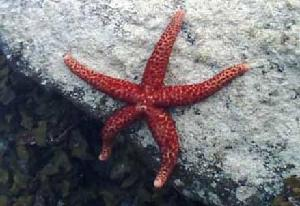

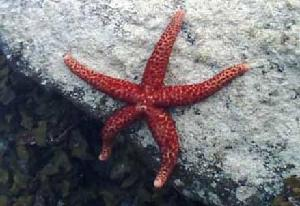

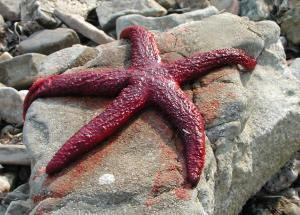

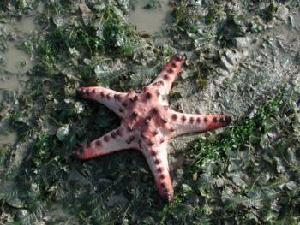

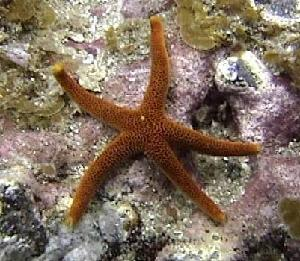

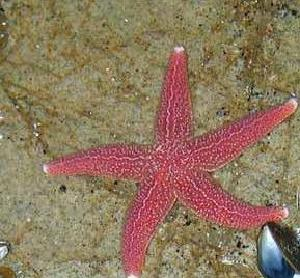

['data/starfishimage_0059.jpg',
 'data/starfishimage_0039.jpg',
 'data/starfishimage_0046.jpg',
 'data/starfishimage_0006.jpg',
 'data/starfishimage_0070.jpg']

In [ ]:
imagename=item_df['image'][0]
display(Image(filename=imagename))
searchfaiss(PIL.Image.open(imagename), k=10)

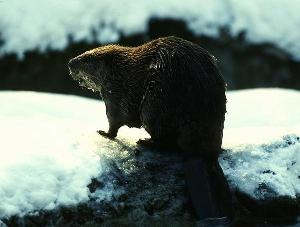

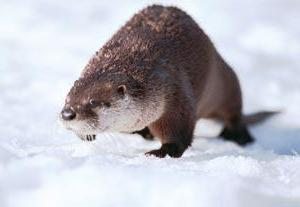

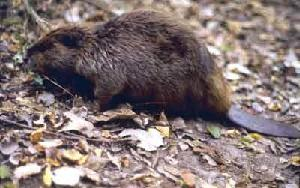

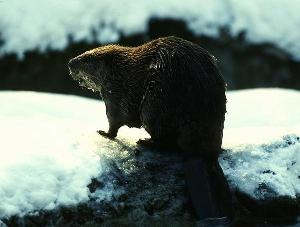

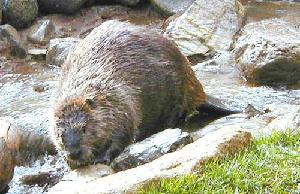

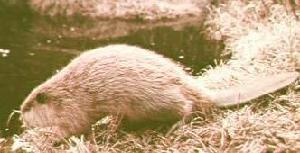

['data/beaverimage_0036.jpg',
 'data/beaverimage_0009.jpg',
 'data/beaverimage_0006.jpg',
 'data/beaverimage_0027.jpg',
 'data/beaverimage_0042.jpg']

In [ ]:
imagename=item_df['image'][100]
display(Image(filename=imagename))
searchfaiss(PIL.Image.open(imagename), k=10)


## Evaluate

In [ ]:
import time
obj = time.gmtime(0)
epoch = time.asctime(obj)


In [ ]:
def searchfaiss_id(query, k):
    qv = model.encode([query])
    top_k = index.search(qv, k)
    top_k_ids = top_k[1].tolist()[0]
    top_k_ids = list(np.unique(top_k_ids))
    results =  [images_list[idx] for idx in top_k_ids]
    return results
    

In [ ]:
results_clip_faiss=dict()

In [ ]:
curr_time = round(time.time()*1000)
for sam_image in queryimage:
  results_clip_faiss[sam_image]=searchfaiss_id(PIL.Image.open(sam_image), k=10)
end_time = round(time.time()*1000)


In [ ]:
print("Total time to search 500 images:",end_time-curr_time)

Total time to search 500 images: 10328


In [ ]:
print("Avarage time:",((end_time-curr_time)/100))

Avarage time: 103.28


In [ ]:
total_hit=0
for key,lst in results_clip_faiss.items():
  label=list(item_df[item_df['image']==key]['class'])[0]
  # print(key)
  # print(label)
  # print("-------------")
  for i in lst:

    # print(i)
    res_label=list(item_df[item_df['image']==i]['class'])[0]
    if(res_label==label):
      total_hit+=1
  # print(total_hit)
  # break


In [ ]:
total_hit

2197

In [ ]:
print('Preceision@10 :'+str(total_hit/(500*10)))

Preceision@10 :0.4394


# Search with FAISS Index training accuracy dropped to .42 search time 95

In [ ]:

!pip install faiss-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import faiss
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('clip-ViT-B-32')



In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
device = torch.device("cuda")
model.to(device)


SentenceTransformer(
  (0): CLIPModel()
)

In [ ]:
import glob
images_list=list(glob.glob('data/*.jpg'))

In [ ]:
import PIL
print("Images:", len(images_list))
img_emb = model.encode([PIL.Image.open(filepath) for filepath in images_list], batch_size=128, convert_to_tensor=False, show_progress_bar=True)


Images: 9144


Batches:   0%|          | 0/72 [00:00<?, ?it/s]

In [ ]:
res = faiss.StandardGpuResources()
index = faiss.GpuIndexIVFFlat(res, img_emb.shape[1], 1000, faiss.METRIC_L2)

In [ ]:
index.train(img_emb)

In [ ]:

#encoded_data = np.asarray(img_emb)
#index = faiss.IndexIDMap(faiss.IndexFlatIP(img_emb.shape[1]))


In [ ]:
index.add_with_ids(img_emb, np.array(range(0, len(images_list))))


### fetch details of the document

In [ ]:

def searchfaiss(query, k):
    qv = model.encode([query])
    top_k = index.search(qv, k)
    top_k_ids = top_k[1].tolist()[0]
    top_k_ids = list(np.unique(top_k_ids))
    results =  [images_list[idx] for idx in top_k_ids]
    for i in results:
      display(Image(filename=i))
    return results

### search

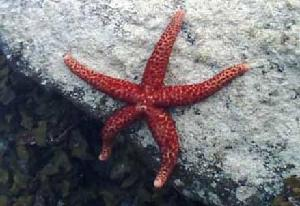

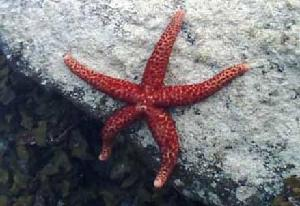

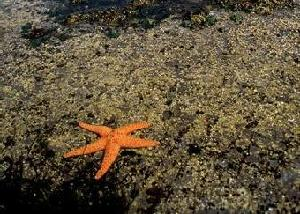

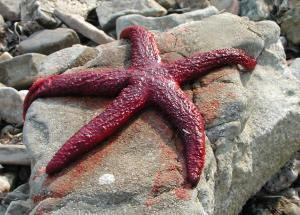

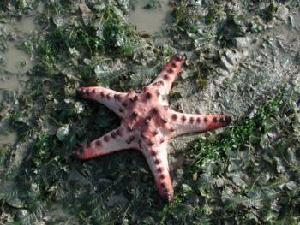

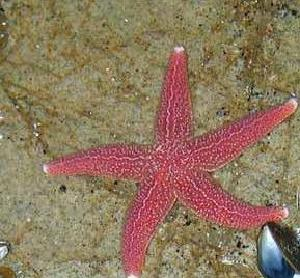

['data/starfishimage_0059.jpg',
 'data/starfishimage_0061.jpg',
 'data/starfishimage_0039.jpg',
 'data/starfishimage_0046.jpg',
 'data/starfishimage_0070.jpg']

In [ ]:
imagename=item_df['image'][0]
display(Image(filename=imagename))
searchfaiss(PIL.Image.open(imagename), k=10)

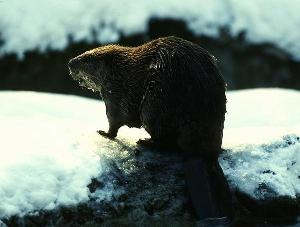

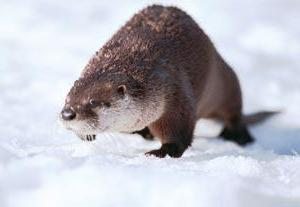

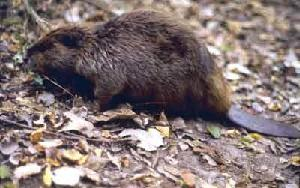

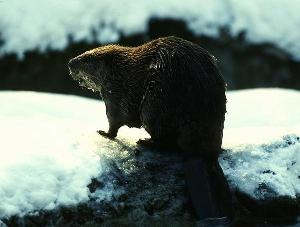

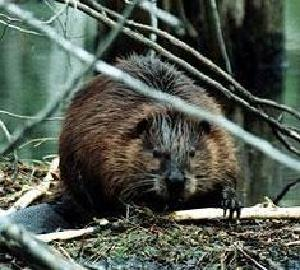

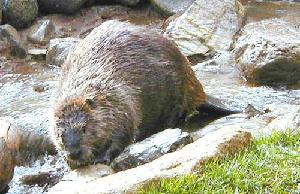

['data/beaverimage_0036.jpg',
 'data/beaverimage_0009.jpg',
 'data/beaverimage_0006.jpg',
 'data/beaverimage_0016.jpg',
 'data/beaverimage_0027.jpg']

In [ ]:
imagename=item_df['image'][100]
display(Image(filename=imagename))
searchfaiss(PIL.Image.open(imagename), k=10)


## Evaluate

In [ ]:
import time
obj = time.gmtime(0)
epoch = time.asctime(obj)


In [ ]:
def searchfaiss_id(query, k):
    qv = model.encode([query])
    top_k = index.search(qv, k)
    top_k_ids = top_k[1].tolist()[0]
    top_k_ids = list(np.unique(top_k_ids))
    results =  [images_list[idx] for idx in top_k_ids]
    return results
    

In [ ]:
results_clip_faiss=dict()

In [ ]:
curr_time = round(time.time()*1000)
for sam_image in queryimage:
  results_clip_faiss[sam_image]=searchfaiss_id(PIL.Image.open(sam_image), k=10)
end_time = round(time.time()*1000)


In [ ]:
print("Total time to search 500 images:",end_time-curr_time)

Total time to search 500 images: 9523


In [ ]:
print("Avarage time:",((end_time-curr_time)/100))

Avarage time: 95.23


In [ ]:
total_hit=0
for key,lst in results_clip_faiss.items():
  label=list(item_df[item_df['image']==key]['class'])[0]
  # print(key)
  # print(label)
  # print("-------------")
  for i in lst:

    # print(i)
    res_label=list(item_df[item_df['image']==i]['class'])[0]
    if(res_label==label):
      total_hit+=1
  # print(total_hit)
  # break


In [ ]:
total_hit

2129

In [ ]:
print('Preceision@10 :'+str(total_hit/(500*10)))

Preceision@10 :0.4258


# Search with FAISS **Index training increase batch size** **accuracy increased .78** search time 96

In [ ]:

!pip install faiss-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import faiss
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('clip-ViT-B-32')



In [ ]:
import torch
torch.cuda.is_available()

True

In [ ]:
device = torch.device("cuda")
model.to(device)


SentenceTransformer(
  (0): CLIPModel()
)

In [ ]:
import glob
images_list=list(glob.glob('data/*.jpg'))

In [ ]:
import PIL
print("Images:", len(images_list))
img_emb = model.encode([PIL.Image.open(filepath) for filepath in images_list], batch_size=512, convert_to_tensor=False, show_progress_bar=True)


Images: 9144


Batches:   0%|          | 0/18 [00:00<?, ?it/s]

In [ ]:
res = faiss.StandardGpuResources()
index = faiss.GpuIndexIVFFlat(res, img_emb.shape[1], 1000, faiss.METRIC_L2)

In [ ]:

index.train(img_emb)

In [ ]:

#encoded_data = np.asarray(img_emb)
#index = faiss.IndexIDMap(faiss.IndexFlatIP(img_emb.shape[1]))


In [ ]:
index.add_with_ids(img_emb, np.array(range(0, len(images_list))))


### fetch details of the document

In [ ]:

def searchfaiss(query, k):
    qv = model.encode([query])
    top_k = index.search(qv, k)
    top_k_ids = top_k[1].tolist()[0]
    top_k_ids = list(np.unique(top_k_ids))
    results =  [images_list[idx] for idx in top_k_ids]
    for i in results:
      display(Image(filename=i))
    return results

### search

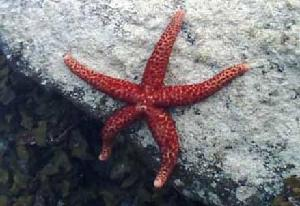

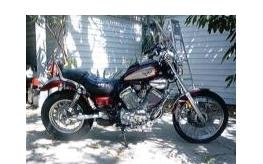

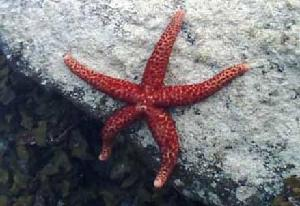

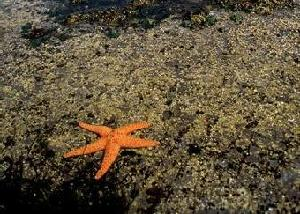

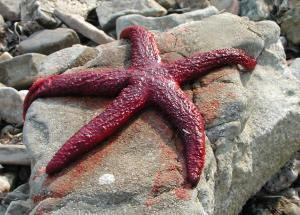

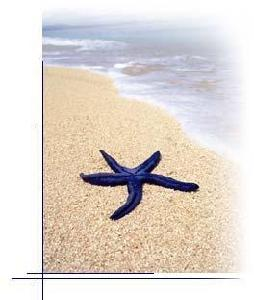

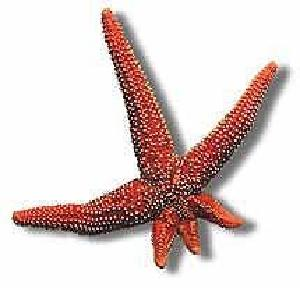

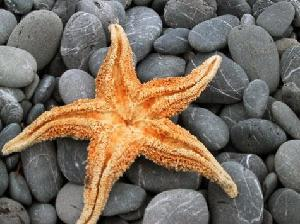

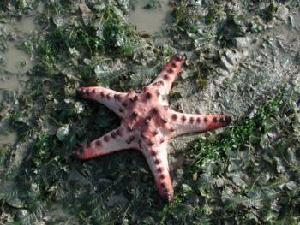

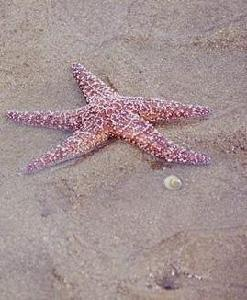

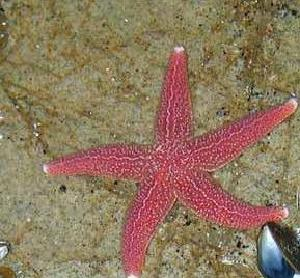

['data/Motorbikesimage_0321.jpg',
 'data/starfishimage_0059.jpg',
 'data/starfishimage_0061.jpg',
 'data/starfishimage_0039.jpg',
 'data/starfishimage_0055.jpg',
 'data/starfishimage_0024.jpg',
 'data/starfishimage_0057.jpg',
 'data/starfishimage_0046.jpg',
 'data/starfishimage_0008.jpg',
 'data/starfishimage_0070.jpg']

In [ ]:
imagename=item_df['image'][0]
display(Image(filename=imagename))
searchfaiss(PIL.Image.open(imagename), k=10)

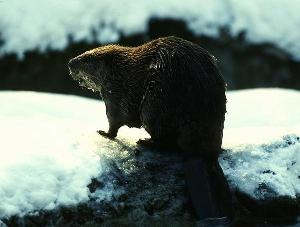

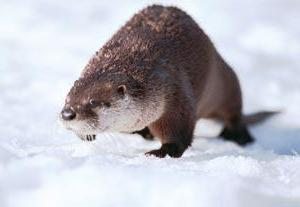

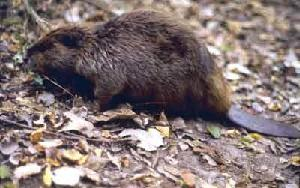

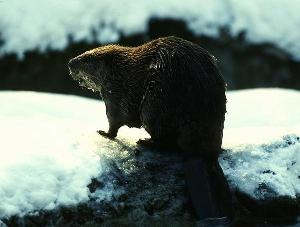

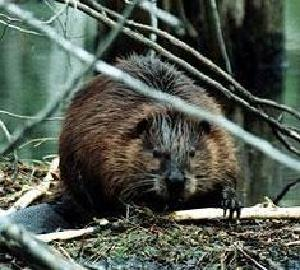

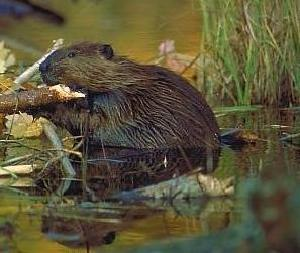

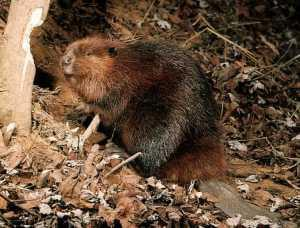

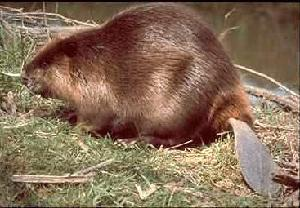

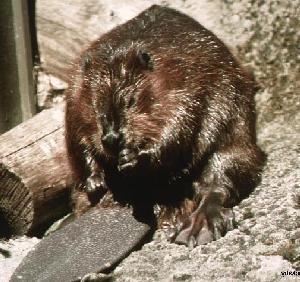

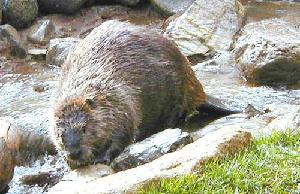

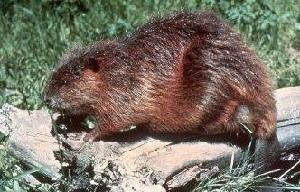

['data/beaverimage_0036.jpg',
 'data/beaverimage_0009.jpg',
 'data/beaverimage_0006.jpg',
 'data/beaverimage_0016.jpg',
 'data/beaverimage_0007.jpg',
 'data/beaverimage_0014.jpg',
 'data/beaverimage_0035.jpg',
 'data/beaverimage_0005.jpg',
 'data/beaverimage_0027.jpg',
 'data/beaverimage_0034.jpg']

In [ ]:
imagename=item_df['image'][100]
display(Image(filename=imagename))
searchfaiss(PIL.Image.open(imagename), k=10)


## Evaluate

In [ ]:
import time
obj = time.gmtime(0)
epoch = time.asctime(obj)


In [ ]:
def searchfaiss_id(query, k):
    qv = model.encode([query])
    top_k = index.search(qv, k)
    top_k_ids = top_k[1].tolist()[0]
    top_k_ids = list(np.unique(top_k_ids))
    results =  [images_list[idx] for idx in top_k_ids]
    return results
    

In [ ]:
results_clip_faiss=dict()

In [ ]:
curr_time = round(time.time()*1000)
for sam_image in queryimage:
  results_clip_faiss[sam_image]=searchfaiss_id(PIL.Image.open(sam_image), k=10)
end_time = round(time.time()*1000)


In [ ]:
print("Total time to search 500 images:",end_time-curr_time)

Total time to search 500 images: 9675


In [ ]:
print("Avarage time:",((end_time-curr_time)/100))

Avarage time: 96.75


In [ ]:
total_hit=0
for key,lst in results_clip_faiss.items():
  label=list(item_df[item_df['image']==key]['class'])[0]
  # print(key)
  # print(label)
  # print("-------------")
  for i in lst:

    # print(i)
    res_label=list(item_df[item_df['image']==i]['class'])[0]
    if(res_label==label):
      total_hit+=1
  # print(total_hit)
  # break


In [ ]:
total_hit

3794

In [ ]:
print('Preceision@10 :'+str(total_hit/(500*10)))

Preceision@10 :0.7588
